<a href="https://colab.research.google.com/github/yejin0455/sesac-ML/blob/main/D06_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [ ]:
perch_full = df.to_numpy()
perch_full[:5]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94]])

In [ ]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
perch_full.shape, perch_weight.shape

((56, 3), (56,))

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
train_input.shape, train_target.shape

((42, 3), (42,))

In [ ]:
test_input.shape, test_target.shape

((14, 3), (14,))

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
train_poly = poly.fit_transform(train_input)
train_poly.shape

(42, 9)

In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [ ]:
test_poly = poly.transform(test_input)

In [ ]:
test_poly.shape

(14, 9)

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
r2_score(train_target, lr.predict(train_poly))

0.9903183436982124

In [ ]:
r2_score(test_target, lr.predict(test_poly))

0.9714559911594134

In [ ]:
for n in range(1, 6):
  poly = PolynomialFeatures(degree=n, include_bias=False)
  train_poly = poly.fit_transform(train_input)
  test_poly = poly.transform(test_input)
  lr = LinearRegression()
  lr.fit(train_poly, train_target)
  print(f"degree:{n}, feature #: {train_poly.shape[1]}")
  print(f"train score: {r2_score(train_target, lr.predict(train_poly))}")
  print(f"test score: {r2_score(test_target, lr.predict(test_poly))}", end='\n\n')

degree:1, feature #: 3
train score: 0.9559326821885706
test score: 0.8796419177546367

degree:2, feature #: 9
train score: 0.9903183436982124
test score: 0.9714559911594134

degree:3, feature #: 19
train score: 0.99638723409801
test score: 0.9410534492233222

degree:4, feature #: 34
train score: 0.9995286898074609
test score: -6.7866969165723585

degree:5, feature #: 55
train score: 0.9999999999991097
test score: -144.40579242684848



In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=True)
train_poly = poly.fit_transform(train_input)
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3'], dtype=object)

In [ ]:
train_poly.shape, test_poly.shape

((42, 55), (14, 55))

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
ss.mean_

array([2.84452381e+01, 8.04238095e+00, 4.82047619e+00, 8.85315000e+02,
       2.53486881e+02, 1.51959000e+02, 7.29365000e+01, 4.36999452e+01,
       2.62868381e+01, 2.97326070e+04, 8.59817581e+03, 5.15200651e+03,
       2.49680043e+03, 1.49567194e+03, 8.99184494e+02, 7.27945149e+02,
       4.36019840e+02, 2.62115117e+02, 1.58141990e+02, 1.05917983e+06,
       3.08429517e+05, 1.84644673e+05, 9.01239554e+04, 5.39478286e+04,
       3.23998082e+04, 2.64224658e+04, 1.58167367e+04, 9.49991053e+03,
       5.72489005e+03, 7.77162422e+03, 4.65285399e+03, 2.79521756e+03,
       1.68494739e+03, 1.01911272e+03, 3.93876111e+07, 1.15192532e+07,
       6.88842737e+06, 3.37865413e+06, 2.02034307e+06, 1.21184517e+06,
       9.93774754e+05, 5.94291271e+05, 3.56516573e+05, 2.14541208e+05,
       2.93110780e+05, 1.75313851e+05, 1.05196649e+05, 6.33244641e+04,
       3.82394901e+04, 8.66870097e+04, 5.18625239e+04, 3.11308026e+04,
       1.87477065e+04, 1.13270112e+04, 6.86569419e+03])

In [ ]:
ss.scale_

array([8.72831196e+00, 2.87343151e+00, 1.74638123e+00, 5.24782988e+02,
       1.60836428e+02, 9.64793789e+01, 4.95165749e+01, 2.97578956e+01,
       1.81139412e+01, 2.50155373e+04, 7.49275582e+03, 4.47153009e+03,
       2.25433695e+03, 1.34683566e+03, 8.11988865e+02, 6.81265335e+02,
       4.07639942e+02, 2.46263218e+02, 1.50164227e+02, 1.10854579e+06,
       3.28247889e+05, 1.95342267e+05, 9.76153931e+04, 5.81064317e+04,
       3.48472685e+04, 2.91591483e+04, 1.73674986e+04, 1.04273041e+04,
       6.30922253e+03, 8.75059964e+03, 5.21694989e+03, 3.13701782e+03,
       1.90225250e+03, 1.16311955e+03, 4.77814865e+07, 1.40483165e+07,
       8.34702250e+06, 4.14736151e+06, 2.46313653e+06, 1.47240427e+06,
       1.22970655e+06, 7.30196641e+05, 4.36628701e+05, 2.62841007e+05,
       3.66270535e+05, 2.17518714e+05, 1.30152823e+05, 7.84482709e+04,
       4.76246733e+04, 1.09609367e+05, 6.51258832e+04, 3.90090183e+04,
       2.35520992e+04, 1.43325296e+04, 8.79122582e+03])

In [ ]:
lr = LinearRegression()
lr.fit(train_scaled, train_target)

LinearRegression()

In [ ]:
r2_score(train_target, lr.predict(train_scaled))

1.0

In [ ]:
r2_score(test_target, lr.predict(test_scaled))

-358.8506853796187

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [ ]:
r2_score(train_target, ridge.predict(train_scaled))

0.9896101671037343

In [ ]:
r2_score(test_target, ridge.predict(test_scaled))

0.9790693977615397

In [ ]:
lr.coef_

array([  -589630.50428447,     58882.34449311,    292479.57220569,
         3614696.48183834,   2676387.94458053,  -4179338.7118309 ,
         1913385.13240721,  -7462398.38874816,   4644311.56635455,
         1112036.40063036, -36636084.40704209,   8265194.27847045,
        10957185.7716744 ,  44560029.60290789, -18234640.43180184,
       -10575138.75195673,   7800352.53410549, -11116646.20387272,
         1508213.91493181,  -2366902.47430755,  32780599.62901321,
        -7086928.93940954,   6162417.45209817, -21442493.36766405,
          958974.60150296,  -6479999.54642182, -16087564.32770296,
       -24612356.30649251,  26477275.88086192,  10193063.18979406,
        -2161671.1629998 ,  -1494715.38324746,  18751463.74649596,
       -11464734.56767054, -16778724.35123863,  21634520.1576195 ,
        17961770.29534124, -15580796.05500649,  -3698271.65887825,
         1658671.24075859, -22830889.42507457,   4544534.09448044,
       -20028333.07968798,  -7658878.67744021,  12298552.83310

In [ ]:
ridge.coef_

array([18.75202605,  9.99048537,  9.64586193, 17.278557  , 14.42089598,
       12.69251285, 12.34283964, 10.88252862, 12.55963482, 12.93825844,
       12.67925897,  9.12136175, 12.49327194,  9.02641662,  8.39716922,
       12.21409663,  8.99564455,  8.85968975, 11.68602892,  7.48294042,
        8.98610839,  3.37199818, 10.27381252,  4.61786228,  1.60700275,
       11.21975321,  5.66171476,  2.9808368 ,  3.17359806, 11.72544455,
        6.40554378,  4.19129005,  5.06384222,  8.89201309,  1.89344091,
        4.81186299, -2.91832747,  7.38733861, -0.51038117, -5.91335297,
        9.5029666 ,  1.56464851, -3.66645267, -6.13031213, 11.06068777,
        3.21356622, -1.71089861, -3.65107495, -2.63704498, 11.98418393,
        4.3636902 , -0.11776857, -1.40420516,  0.45174316,  5.29453248])

In [ ]:
for n in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
  ridge = Ridge(alpha=n)
  ridge.fit(train_scaled, train_target)
  print(f"alpha:{n}")
  print(f"train score: {r2_score(train_target, ridge.predict(train_scaled))}")
  print(f"test score: {r2_score(test_target, ridge.predict(test_scaled))}", end='\n\n')

alpha:0.001
train score: 0.9930455252088191
test score: 0.9569388961556926

alpha:0.01
train score: 0.9917809981250538
test score: 0.9800187936873143

alpha:0.1
train score: 0.9903815817570366
test score: 0.9827976465386926

alpha:1
train score: 0.9896101671037343
test score: 0.9790693977615397

alpha:10
train score: 0.988728468997471
test score: 0.9725329582461569

alpha:100
train score: 0.9841843235774494
test score: 0.9627042641050291

alpha:1000
train score: 0.8918186303757933
test score: 0.8980712146634267



In [ ]:
train_score, test_score = [], []
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for n in alphas:
  ridge = Ridge(alpha=n)
  ridge.fit(train_scaled, train_target)
  train_score.append(r2_score(train_target, ridge.predict(train_scaled)))
  test_score.append(r2_score(test_target, ridge.predict(test_scaled)))

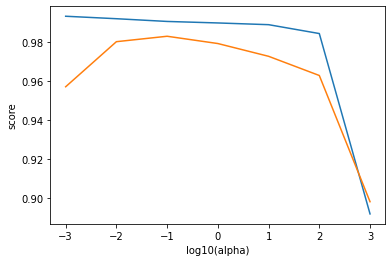

In [ ]:
plt.plot(np.log10(alphas), train_score)
plt.plot(np.log10(alphas), test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('score')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

In [ ]:
r2_score(train_target, lasso.predict(train_scaled))

0.989789897208096

In [ ]:
r2_score(test_target, lasso.predict(test_scaled))

0.9800593698421883

In [ ]:
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
alphas = [0.001, 0.01, 0.1, 10, 100]
for n in alphas:
  lasso = Lasso(alpha=n)
  lasso.fit(train_scaled, train_target)
  print(f"alpha:{n}")
  print(f"train score: {r2_score(train_target, lasso.predict(train_scaled))}")
  print(f"test score: {r2_score(test_target, lasso.predict(test_scaled))}", end='\n\n')

alpha:0.001
train score: 0.990856843502147
test score: 0.9836870822242811

alpha:0.01
train score: 0.9907921500205304
test score: 0.9836730006301534

alpha:0.1
train score: 0.990137631128448
test score: 0.9819405116249363

alpha:10
train score: 0.9888067471131867
test score: 0.9824470598706695

alpha:100
train score: 0.9078632190121442
test score: 0.9089071866576974



In [ ]:
lasso.alpha

100

In [ ]:
lasso.coef_

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.50261219,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        81.7197224 , 167.24554985,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

In [ ]:
train_score, test_score = [], []
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
for n in alphas:
  lasso = Lasso(alpha=n)
  lasso.fit(train_scaled, train_target)
  train_score.append(r2_score(train_target, lasso.predict(train_scaled)))
  test_score.append(r2_score(test_target, lasso.predict(test_scaled)))

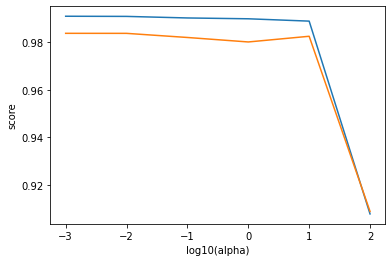

In [ ]:
plt.plot(np.log10(alphas), train_score)
plt.plot(np.log10(alphas), test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('score')
plt.show()

In [ ]:
np.sum(lasso.coef_ == 0)

52

In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [ ]:
lasso.coef_ != 0

array([False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
poly.get_feature_names_out()[lasso.coef_ != 0]

array(['x0 x1', 'x0 x1^2', 'x0 x1 x2'], dtype=object)